In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import multivariate_normal

In [0]:
def prepare_dataset(n1, mu1, variance1, n2, mu2, variance2):
    df1 = DataFrame(multivariate_normal(mu1, np.eye(2)*variance1 ,n1),
                    columns=['x', 'y'])
    df1['type'] = 1
    df2 = DataFrame(multivariate_normal(mu2, np.eye(2)*variance2, n2),
                    columns=['x', 'y'])
    df2['type'] = -1
    df = pd.concat([df1, df2], ignore_index=True)
    df = df.reindex(np.random.permutation(df.index)).reset_index(drop=True)
    return df

In [0]:
train_set = prepare_dataset(20, [15, 10], 15, 30, [0, 0], 15)

In [4]:
train_set.head(10)

,x,y,type
0,-3.851806,2.134827,-1
1,20.223868,6.972840,1
2,10.856946,3.829381,-1
3,5.363482,-0.144875,-1
4,1.894836,-1.904762,-1
5,-2.531848,-3.007559,-1
6,5.449895,-1.568183,-1
7,7.346714,8.025478,1
8,11.879212,10.392627,1
9,-4.024408,6.660849,-1


In [0]:
def prepare_dataset_debug(n1, mu1, variance1, n2, mu2, variance2):
    df1 = DataFrame(multivariate_normal(mu1, np.eye(2)*variance1 ,n1),
                    columns=['x', 'y'])
    df1['type'] = 1
    
    print ('\ndf1:')
    print (df1.head())
    
    df2 = DataFrame(multivariate_normal(mu2, np.eye(2)*variance2, n2),
                    columns=['x', 'y'])
    df2['type'] = -1
    
    print ('\ndf2:')
    print (df2.head())
        
    df = pd.concat([df1,df2], ignore_index=True)
    df = df.reindex(np.random.permutation(df.index)).reset_index(drop=True)
    return df

In [6]:
train_set = prepare_dataset_debug(20, [15, 10], 15, 30, [0, 0], 15)


df1:
           x          y  type
0  21.396755   7.152329     1
1  10.336562  14.693863     1
2  12.071965   8.028183     1
3  16.803204  12.892946     1
4  15.432991   9.983410     1

df2:
          x         y  type
0  0.914305 -2.151521    -1
1  3.991985 -2.199325    -1
2 -0.891209  3.539746    -1
3  0.923550  0.322840    -1
4  2.090958 -4.004746    -1


In [0]:
def run_train(train_set):
    # パラメータの初期値とbias項の設定
    w0 = w1 = w2 = 0.0
    bias = 0.5 * (train_set.x.mean() + train_set.y.mean())

    # Iterationを実施
    paramhist = DataFrame([[w0, w1, w2]], columns=['w0', 'w1', 'w2'])
    for i in range(30):
        for index, point in train_set.iterrows():
            x, y, type = point.x, point.y, point.type
            if type * (w0*bias + w1*x + w2*y) <= 0:
                w0 += type * bias
                w1 += type * x
                w2 += type * y
        paramhist = paramhist.append(Series([w0,w1,w2], ['w0', 'w1', 'w2']),
                                     ignore_index=True)
    
    # 判定誤差の計算
    err = 0
    for index, point in train_set.iterrows():
        x, y, type = point.x, point.y, point.type
        if type * (w0*bias + w1*x + w2*y) <= 0:
            err += 1
    err_rate = err * 100 / len(train_set)
    
    return paramhist, err_rate

In [8]:
paramhist, err_rate = run_train(train_set)
paramhist.head(10)

,w0,w1,w2
0,0.000000,0.000000,0.00000
1,-16.624416,12.963653,1.45601
2,-16.624416,18.507677,12.48321
3,-27.707361,12.299306,11.09273
4,-27.707361,12.299306,11.09273
5,-27.707361,12.299306,11.09273
6,-27.707361,12.299306,11.09273
7,-27.707361,12.299306,11.09273
8,-27.707361,12.299306,11.09273
9,-27.707361,12.299306,11.09273


In [0]:
def show_result(subplot, train_set, w0, w1, w2, err_rate):
    train_set1 = train_set[train_set['type']==1]
    train_set2 = train_set[train_set['type']==-1]
    bias = 0.5 * (train_set.x.mean() + train_set.y.mean())
    ymin, ymax = train_set.y.min()-5, train_set.y.max()+10
    xmin, xmax = train_set.x.min()-5, train_set.x.max()+10

    subplot.set_ylim([ymin-1, ymax+1])
    subplot.set_xlim([xmin-1, xmax+1])
    subplot.scatter(train_set1.x, train_set1.y, marker='o', label=None)
    subplot.scatter(train_set2.x, train_set2.y, marker='x', label=None)

    linex = np.arange(xmin-5, xmax+5)
    liney = - linex * w1 / w2 - bias * w0 / w2
    label = "ERR %.2f%%" % err_rate
    subplot.plot(linex, liney, label=label, color='red')
    subplot.legend(loc=1)

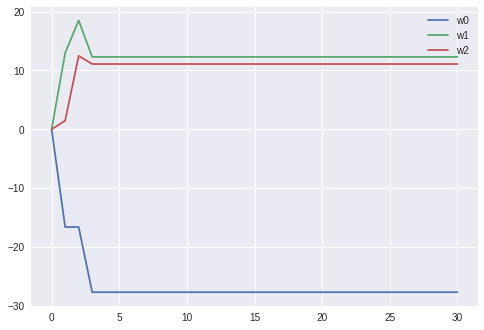

In [10]:
paramhist.plot().legend(loc=1)

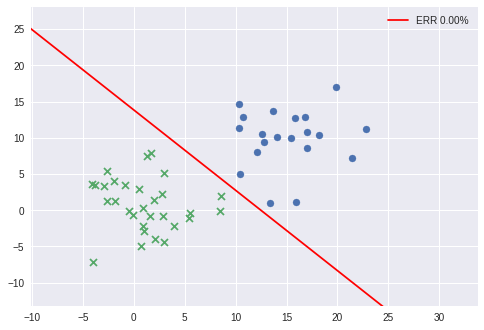

In [11]:
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
params = paramhist[-1:]
w0, w1, w2 = float(params.w0), float(params.w1), float(params.w2)
show_result(subplot, train_set, w0, w1, w2, err_rate)